# Assignment8

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
df.head(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [5]:
df.info

<bound method DataFrame.info of             Price  Mileage    Make     Model           Trim   Type  Cylinder  \
0    17314.103129     8221   Buick   Century       Sedan 4D  Sedan         6   
1    17542.036083     9135   Buick   Century       Sedan 4D  Sedan         6   
2    16218.847862    13196   Buick   Century       Sedan 4D  Sedan         6   
3    16336.913140    16342   Buick   Century       Sedan 4D  Sedan         6   
4    16339.170324    19832   Buick   Century       Sedan 4D  Sedan         6   
..            ...      ...     ...       ...            ...    ...       ...   
799  16507.070267    16229  Saturn  L Series  L300 Sedan 4D  Sedan         6   
800  16175.957604    19095  Saturn  L Series  L300 Sedan 4D  Sedan         6   
801  15731.132897    20484  Saturn  L Series  L300 Sedan 4D  Sedan         6   
802  15118.893228    25979  Saturn  L Series  L300 Sedan 4D  Sedan         6   
803  13585.636802    35662  Saturn  L Series  L300 Sedan 4D  Sedan         6   

     Li

In [6]:
#Part 1 linear reg equation for mileage vs price
#df.filter(['Mileage', 'Price'], axis = 1)
x=df[["Mileage"]].values
y=df["Price"]
print(x.shape,y.shape)

(804, 1) (804,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)
model=LinearRegression()
model.fit(x_train,y_train)
print("Linear Regression Equation is Y=",model.coef_,"x+",model.intercept_)

Linear Regression Equation is Y= [-0.16517174] x+ 24712.762957955754


Text(0, 0.5, 'Price')

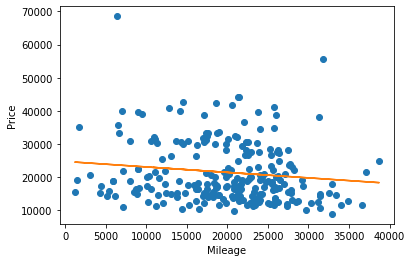

In [16]:
#Chart Original with eaquation
plt.plot(x_test, y_test,'o')
plt.plot(x_test,model.predict(x_test))
plt.xlabel("Mileage")
plt.ylabel("Price")

In [14]:
#Find R2 Score
scor=model.score(x_test,y_test)
print("score is",scor)

score is 0.022955088325903095


Score is less than 0.8 which shows there is no Strong correlation.

Part 2

In [17]:
#Since choosing a single feature is not viable , we perform mutli variable Linear Regression 
x1=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]].values
y1=df["Price"]
print(x1.shape,y1.shape)

(804, 7) (804,)


In [18]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=5)
model1=LinearRegression()
model1.fit(x1_train,y1_train)
print("Linear Regression Equation is Y=",model1.coef_,"x+",model1.intercept_)

Linear Regression Equation is Y= [-1.95574397e-01  4.01633109e+03 -1.02646571e+03 -1.56063080e+03
  6.31852670e+03 -2.34745572e+03  3.66051602e+03] x+ 6935.959069847959


In [20]:
#Find R2 Score
scor1=model1.score(x1_test,y1_test)
print("score is",scor1)

score is 0.4327066432439928


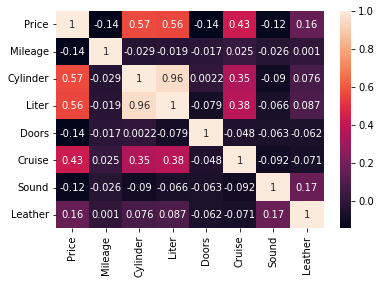

In [22]:
#Find Features for best Prediction 
sns.heatmap(df.corr(),annot=True)

In [23]:
#Correlation Matrix shows that Cylinder and litre are best predictors
X1=df[['Mileage']]
X2=df[['Cylinder']]
X3=df[['Liter']]
X4=df[['Doors']]
X5=df[['Cruise']]
X6=df[['Sound']]
X7=df[['Leather']]
Y=df['Price']

model1.fit(X1,Y)
print('Mileage Score :',model1.score(X1,Y)*100)
model1.fit(X2,Y)
print('Cylinder Score :',model1.score(X2,Y)*100)
model1.fit(X3,Y)
print('Liter Score :',model1.score(X3,Y)*100)
model1.fit(X4,Y)
print('Doors Score :',model1.score(X4,Y)*100)
model1.fit(X5,Y)
print('Cruise Score :',model1.score(X5,Y)*100)
model1.fit(X6,Y)
print('Sound Score :',model1.score(X6,Y)*100)
model1.fit(X7,Y)
print('Leather Score :',model1.score(X7,Y)*100)

Mileage Score : 2.046344732348926
Cylinder Score : 32.385903759512246
Liter Score : 31.152674427904504
Doors Score : 1.9251466591467037
Cruise Score : 18.563300929692762
Sound Score : 1.5462387624189389
Leather Score : 2.4710851264124534


Cylinder and Liter can be said as the factors for price prediction.

In [24]:
#dummy variables in scikit-learn to see how to use the make, model, and body type

df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [25]:
df['Model'].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [26]:
df['Type'].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [27]:
df = pd.get_dummies(df,columns=['Make','Model','Type'])
df.head()

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Buick,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [28]:
df.columns

Index(['Price', 'Mileage', 'Trim', 'Cylinder', 'Liter', 'Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon'],
      dtype='object')

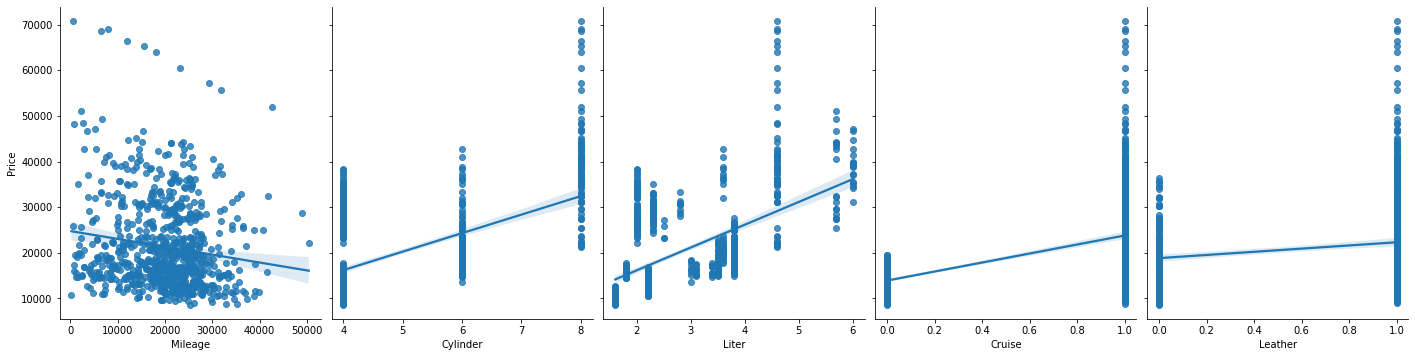

In [31]:
sns.pairplot(df,x_vars=["Mileage", "Cylinder","Liter","Cruise",'Leather'], y_vars=["Price"],
             height=5,aspect=.8, kind="reg")
plt.show()

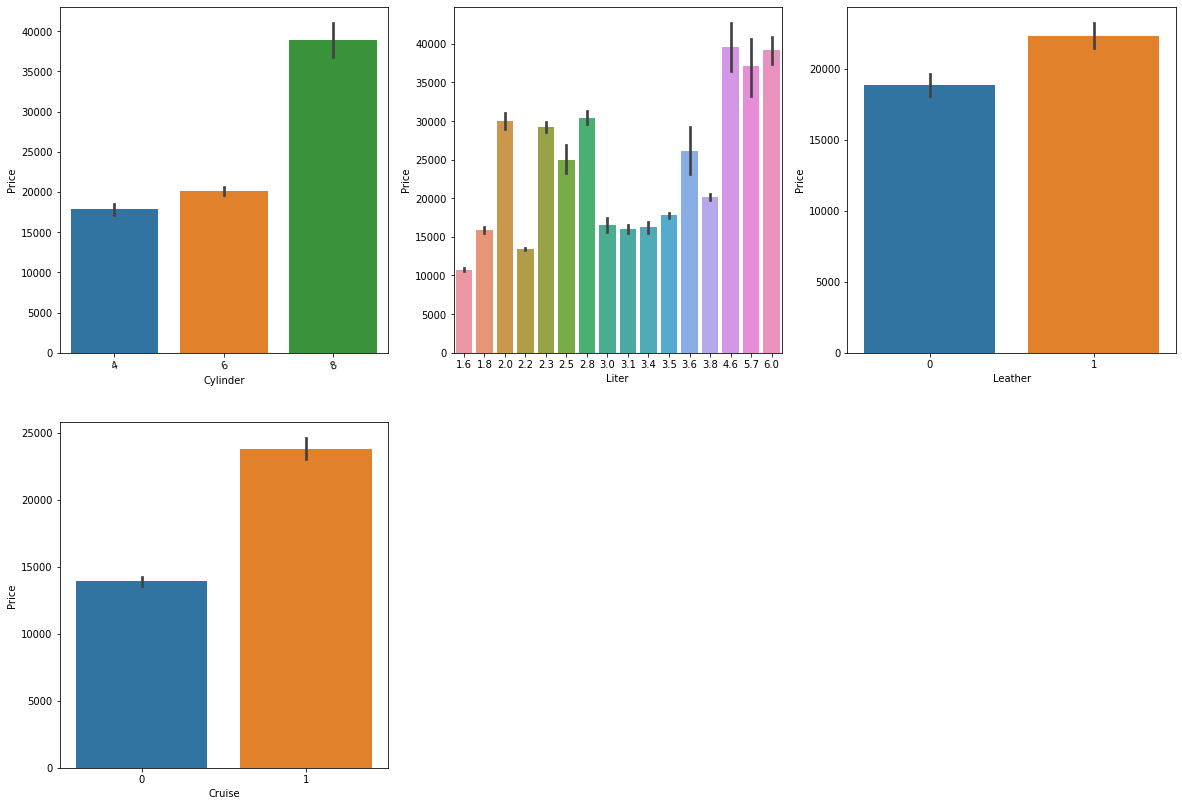

In [36]:
plt.figure(figsize=(20,14))
plt.subplot(231)
sns.barplot(x=df.Cylinder, y=df.Price)
plt.xticks(rotation=19)
plt.subplot(232)
sns.barplot(x=df.Liter, y=df.Price)
plt.subplot(233)
sns.barplot(x=df.Leather, y=df.Price)
plt.subplot(234)
sns.barplot(x=df.Cruise, y=df.Price)

plt.show()

In [37]:
#Cylinder and Liter can be said as the factors for price prediction.